#**Lab 4 : CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from jupyterthemes import jtplot
from sklearn.cluster import KMeans as km
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.mixture import GaussianMixture as GMM
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

(400,)


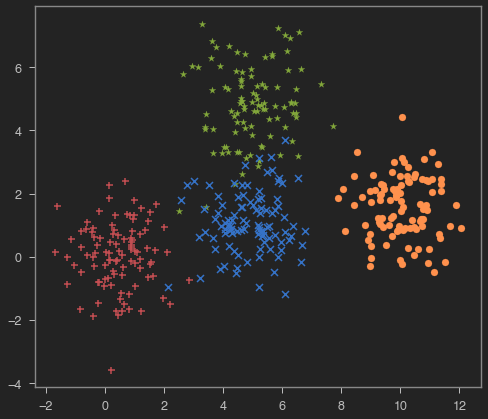

In [2]:
# write your code here
#generation of data
def dataset(num,mean,cov):
    data = np.random.multivariate_normal(mean, cov, num)
    return(data.T[0],data.T[1])

datax = np.array([])
datay = np.array([])
mu = np.array([[0.5,0],[5,5],[5,1],[10,1.5]])
cov = np.array([[1,1],[1,1],[1,1],[1,1]])
clr = ['r','g','b','y']
mrk = ['+','*','x','o']
for i in range(0,4):
    mean = mu[i,:]
    covariance = np.array([[cov[i,0],0],[0,cov[i,1]]])
    x,y = dataset(100,mean,covariance)
    datax = np.append(datax,x)
    datay = np.append(datay,y)
    plt.scatter(x,y,color = clr[i],marker = mrk[i])
print(datax.shape)

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

Cluster_X: [-0.19584924  3.73784854  6.08246395  9.01304502] 
Cluster_Y: [ 1.45866172  1.2064784  -1.16509769  1.73010921]


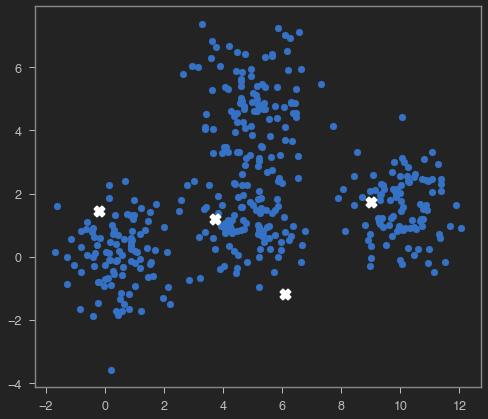

In [3]:
# write your code here
#defining clusters
ind = np.random.randint(0,399,4)
clstr_x = np.array([])
clstr_y = np.array([])
# clstr_x = np.random.choice(datax.flatten(), 4, replace=False)
# clstr_y = np.random.choice(datay.flatten(), 4, replace=False)
clstr_x = np.append(clstr_x,datax[ind])
clstr_y = np.append(clstr_y,datay[ind])
plt.figure()
plt.scatter(datax,datay)
plt.scatter(clstr_x,clstr_y,color = 'white',marker = 'X',linewidth=2,s=100)
print("Cluster_X:",clstr_x,"\nCluster_Y:",clstr_y)

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

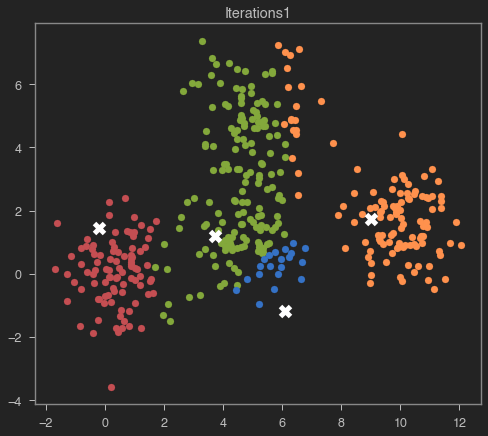

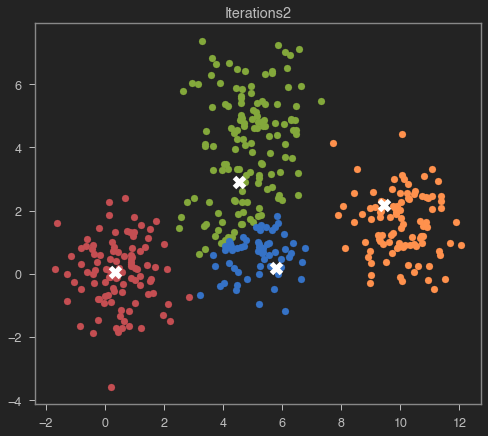

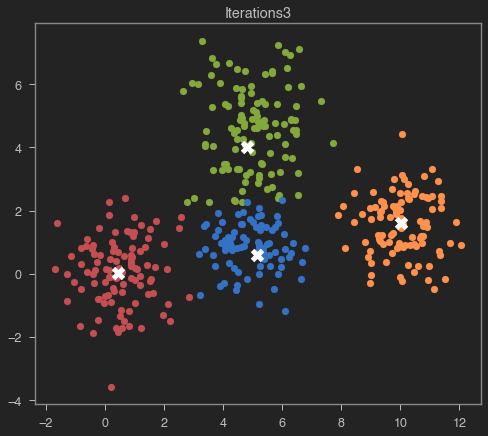

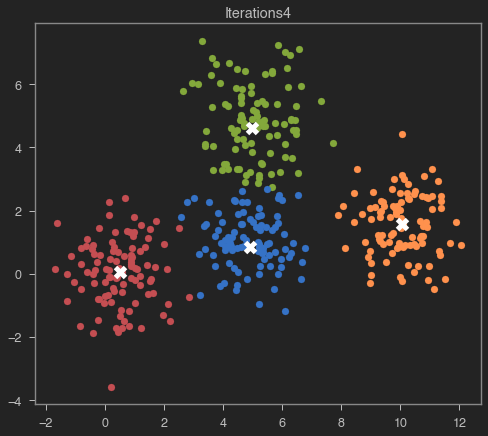

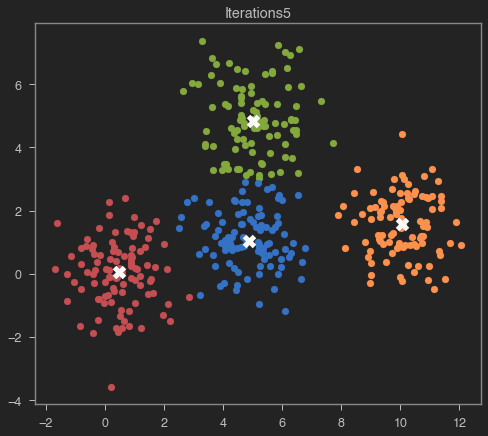

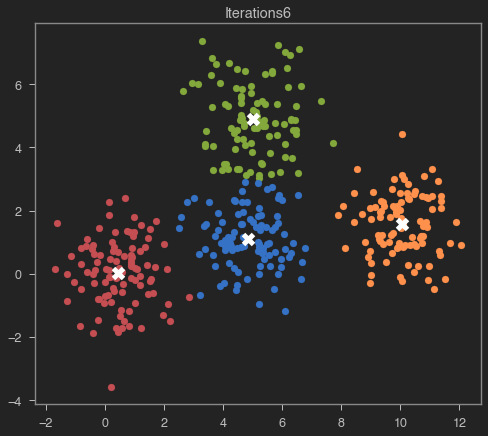

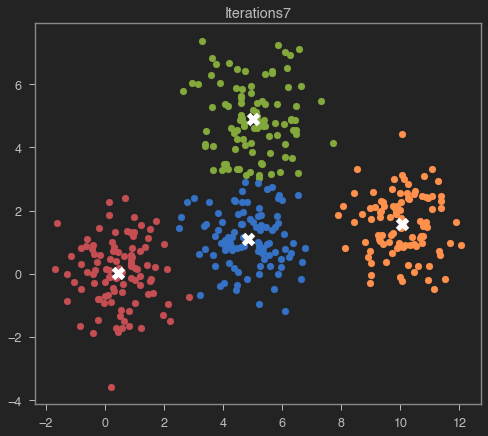

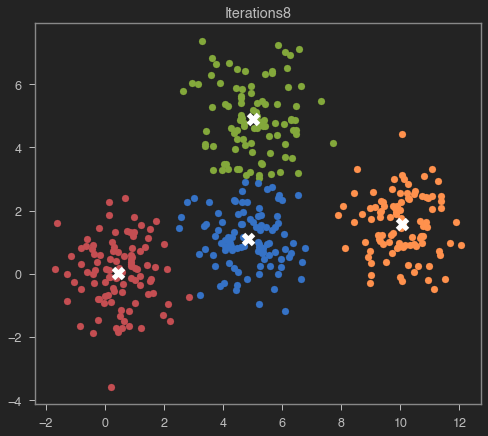

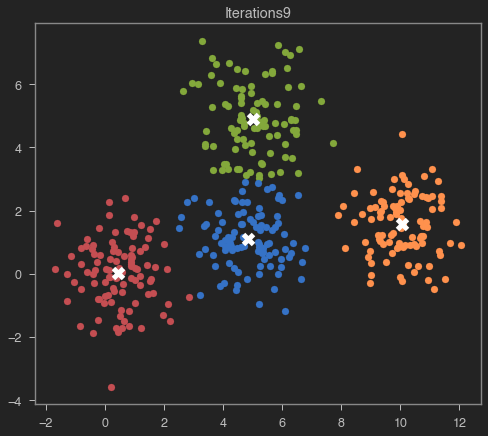

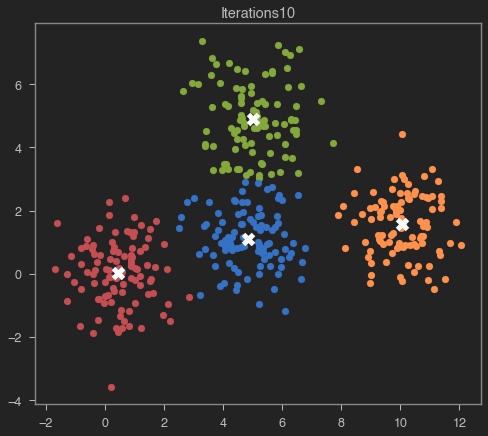

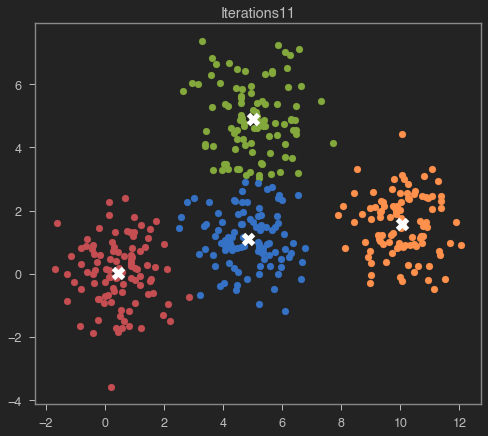

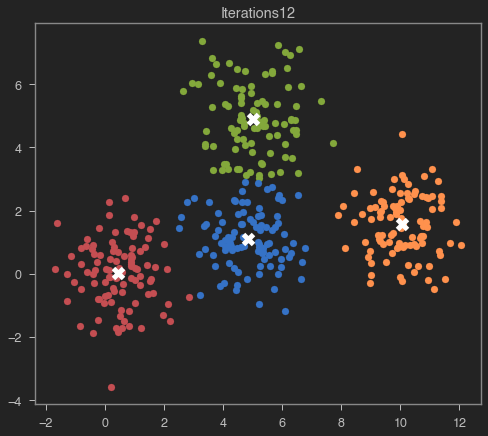

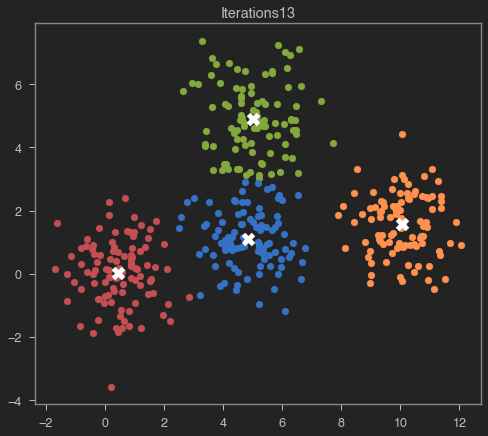

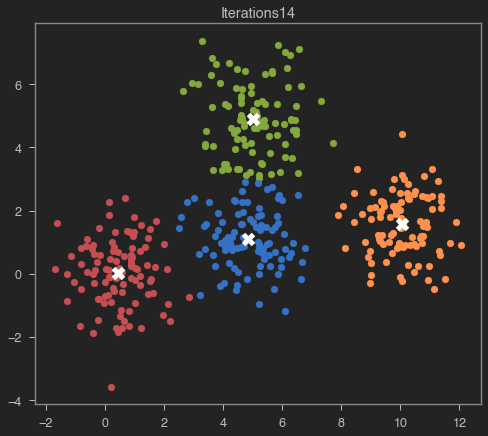

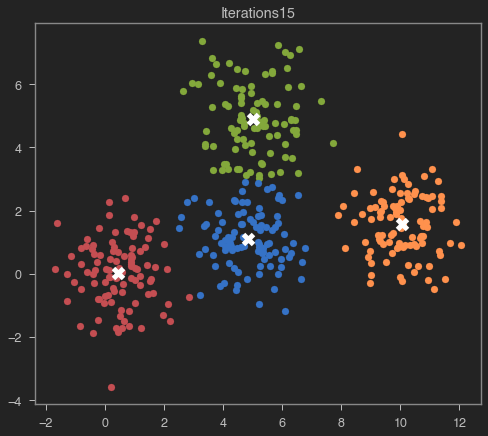

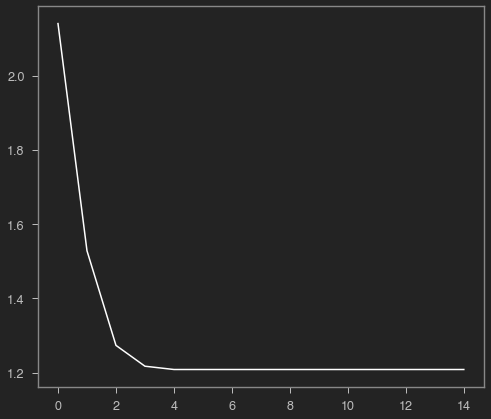

In [4]:
# write your code here
Error = np.zeros(15)
for num in range(15):
    clstr_ass = {
        0 : [[],[]],
        1 : [[],[]],
        2 : [[],[]],
        3 : [[],[]]
    } 
    distx = np.array([])
    disty = np.array([])
    for i in range(0,4):
        distx = np.append(distx,(clstr_x[i] - datax)**2)
        disty = np.append(disty,(clstr_y[i] - datay)**2)
        dist = distx+disty
    Error[num] = 4*np.mean((dist)**0.5)
    dist = np.reshape(dist,(4,400))
    dist = dist.T
    min_d = np.min(dist,axis=1)
    inx = np.argmin(dist,axis=1)
    Error[num] = np.mean((min_d)**0.5)
    clr = ['r','g','b','y']
    mrk = ['+','*','x','o']
    for i in range(len(inx)):
        clstr_ass[inx[i]] = np.append(clstr_ass[inx[i]],np.array([[datax[i]],[datay[i]]]),axis=1)
    plt.figure()
    for i in range(4):
        plt.scatter(clstr_ass[i][0,:],clstr_ass[i][1,:],color=clr[i])
        plt.scatter(clstr_x[i],clstr_y[i],marker = 'x',color='white',s=100,linewidths=5)
    plt.title("Iterations"+str(num+1))
    for i in range(4):
        clstr_x[i] = np.mean(clstr_ass[i][0,:])
        clstr_y[i] = np.mean(clstr_ass[i][1,:])
plt.figure()
plt.plot(Error,color='white')
# print(clstr_ass[1][0,:].size)
# print("Cluster_X:",clstr_x,"\nCluster_Y:",clstr_y)

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [5]:
# write your code here
a_x = np.array([])
b_x = np.array([])
means = np.array([])

for i in range(4):
    for j in range(len(clstr_ass[i][0,:])):
        b = np.array([])
        a_x = np.append(a_x,np.mean(np.sqrt((clstr_ass[i][0,:]-clstr_ass[i][0,j])**2 + (clstr_ass[i][1,:]-clstr_ass[i][1,j])**2)))
        
        b_x = np.append(b_x,np.mean(np.sqrt((clstr_ass[(i+1)%4][0,:]-clstr_ass[i][0,j])**2 + (clstr_ass[(i+1)%4][1,:]-clstr_ass[i][1,j])**2)))
        b_x = np.append(b_x,np.mean(np.sqrt((clstr_ass[(i+2)%4][0,:]-clstr_ass[i][0,j])**2 + (clstr_ass[(i+2)%4][1,:]-clstr_ass[i][1,j])**2)))
        b_x = np.append(b_x,np.mean(np.sqrt((clstr_ass[(i+3)%4][0,:]-clstr_ass[i][0,j])**2 + (clstr_ass[(i+3)%4][1,:]-clstr_ass[i][1,j])**2)))
        
        b = np.append(b,np.min(b_x))
s = (b-a_x)/(np.maximum(b,a_x))
s = np.mean(s)
print(s)  

0.222885137182403


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

(400, 2)


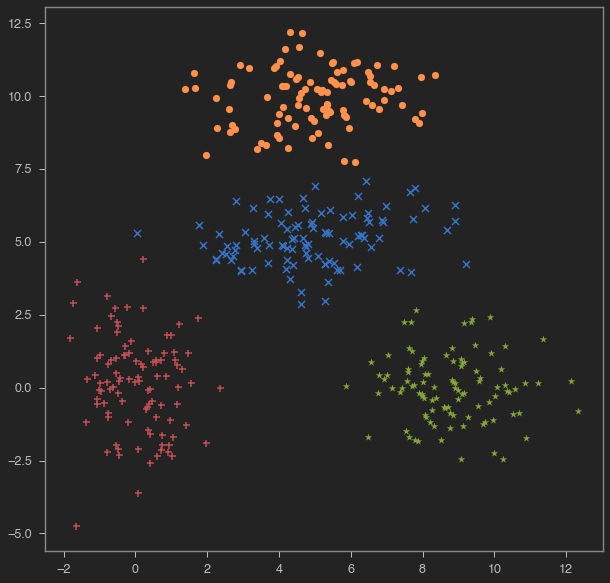

<Figure size 576x504 with 0 Axes>

In [6]:
# write your code here
def dataset(num,mean,cov):
    data = np.random.multivariate_normal(mean, cov, num)
    return(data.T[0],data.T[1])
scaler = StandardScaler()
datax = np.array([])
datay = np.array([])
mu = np.array([[0,0],[9,0],[5,5],[5,10]])
cov = np.array([[1,2],[2,1],[3,1],[3,1]])
clr = ['r','g','b','y']
mrk = ['+','*','x','o']
plt.figure(figsize=(10,10))
for i in range(0,4):
    mean = mu[i,:]
    covariance = np.array([[cov[i,0],0],[0,cov[i,1]]])
    x,y = dataset(100,mean,covariance)
    datax = np.append(datax,x)
    datay = np.append(datay,y)
    plt.scatter(x,y,color = clr[i],marker = mrk[i])
data = np.array([datax,datay])
plt.figure()
data = scaler.fit_transform(data.T)
print(data.shape)

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [7]:
def initialization(data,K):
  # write your code here
    ind = np.random.randint(0,400,K)
    mu = np.array([data[ind,0],data[ind,1]])
    mu = mu.T
    cov = np.identity(2)
    w = np.ones(K)/K;
    theta = np.array([])
    for i in range(K):
        tmp = {
            "mu" : mu[i,:],
            "cov" : cov,
            "w" : w[i]
        }
        theta = np.append(theta,tmp)
    return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [8]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):
    responsibility = np.array([])
    for i in range(K):
        p = np.array([])
        for j in range (len(data[:,0])):    
            tmp = theta[i]["w"]*multivariate_normal.pdf(data[j,:],theta[i]["mu"],theta[i]["cov"])
            p = np.append(p,tmp)
        responsibility = np.append(responsibility,p)
    responsibility = np.reshape(responsibility,(4,400))
    responsibility = responsibility.T
    sm = np.sum(responsibility,axis=1,keepdims = True)
    #sm = np.reshape(sm,(400,1))
    responsibility = responsibility/sm
    
    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [9]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
     # write your code here
       #print(responsibility)
        N_k = np.sum(responsibility,axis=0,keepdims = True)
        w = N_k/400.0
        mu = (data.T)@(responsibility)/N_k
        mu = mu.T
        
        theta = np.array([])
        for i in range(len(mu[:,0])):
            sm = 0
            mu_k = np.ones((len(data[:,0]),2))*mu[i,:]
            
            covx = np.sum((responsibility[:,i])*((data[:,0]-mu_k[:,0])**2))/N_k[0,i]
            #covx = ((data[:,0]-mu_k[:,0]).T)@covx
            
            covy = np.sum((responsibility[:,i])*((data[:,1]-mu_k[:,1])**2))/N_k[0,i]
            #covy = ((data[:,1]-mu_k[:,1]).T)@covy
            
            cov = np.array([covx,0,0,covy])
            cov = np.reshape(cov,(2,2))
            tmp = {
            "mu" : mu[i,:],
            "cov" : cov,
            "w" : w[0,i]
            }
            theta = np.append(theta,tmp)
        log_likelihood = 0
        for j in range(len(data[:,0])):
            p = np.array([])
            sm = 0
            for i in range(4):
                tmp = theta[i]["w"]*multivariate_normal.pdf(data[j,:],theta[i]["mu"],theta[i]["cov"])
                p = np.append(p,tmp)
                sm += tmp
            log_likelihood += np.log(sm)
        #print(theta[0]["cov"])
        #print(N_k)
        return theta, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

/var/folders/ls/mdl2q7410zj32bxvvf078ff40000gn/T/ipykernel_66198/3877709243.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


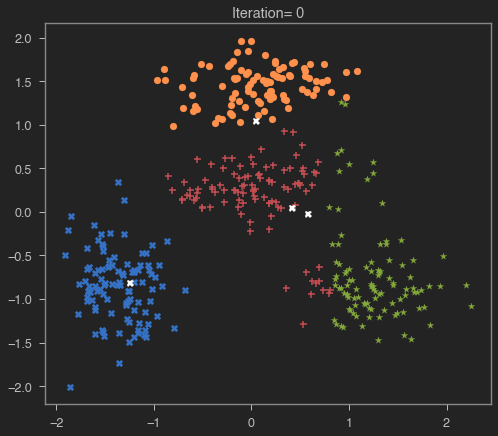

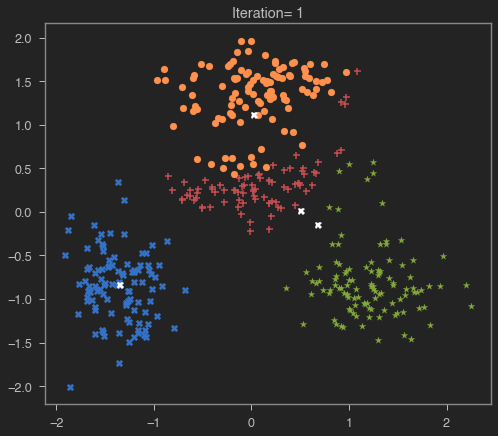

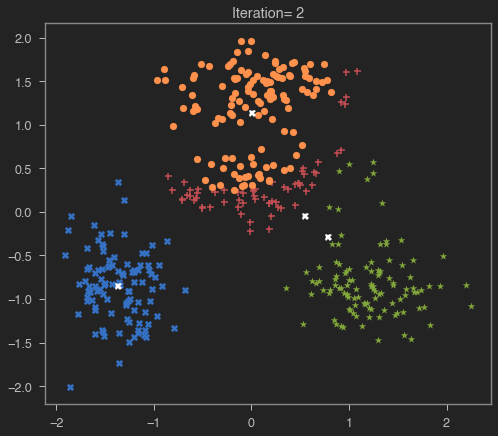

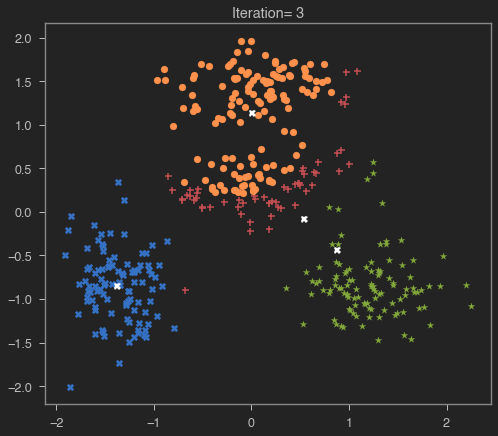

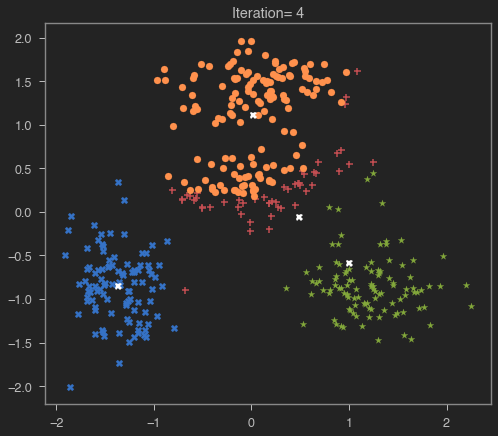

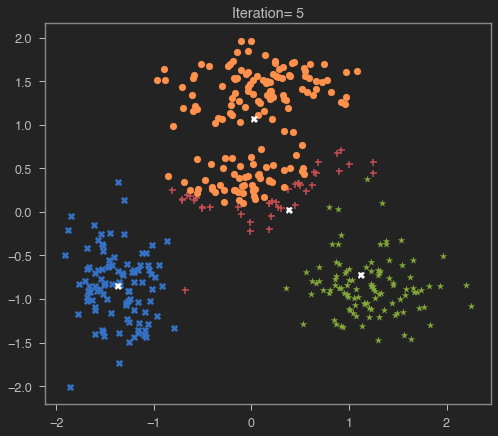

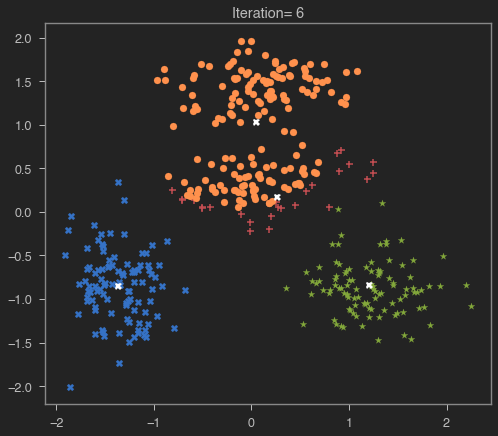

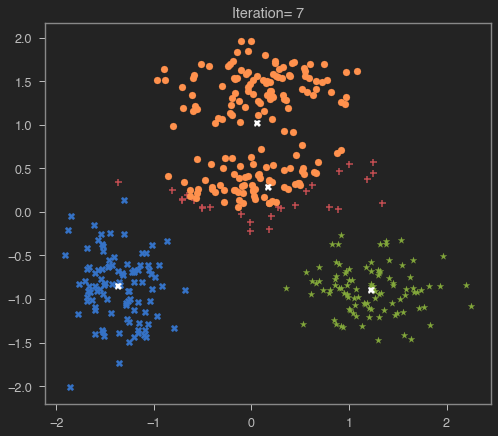

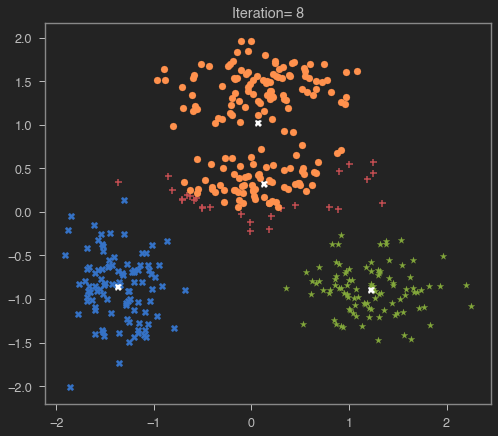

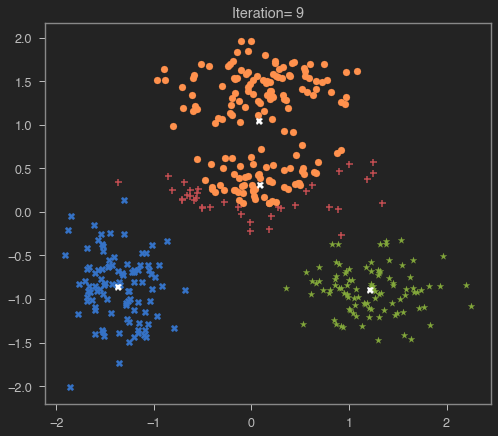

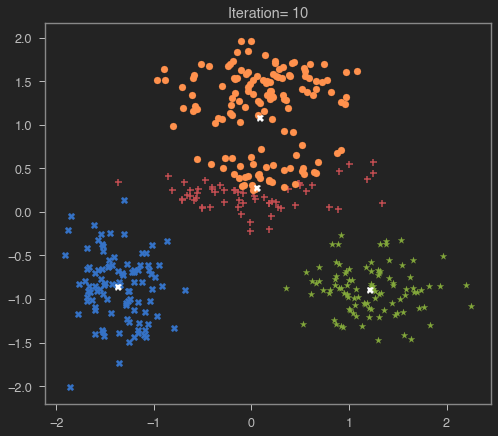

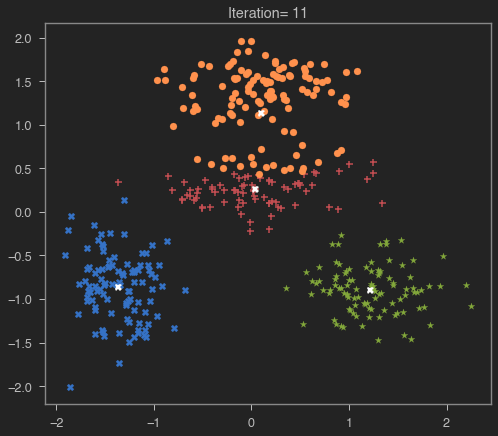

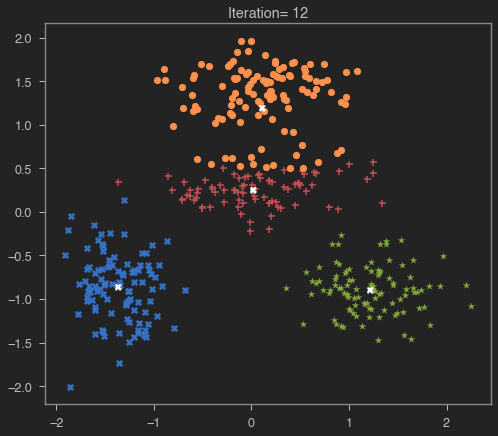

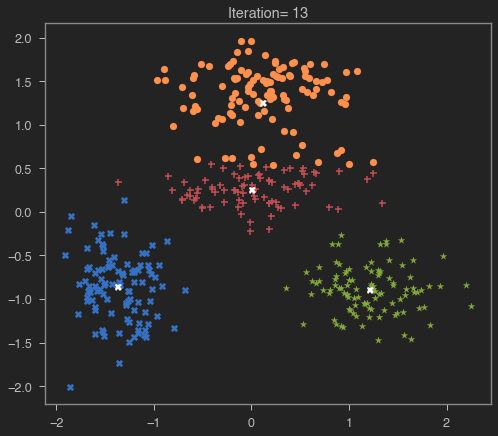

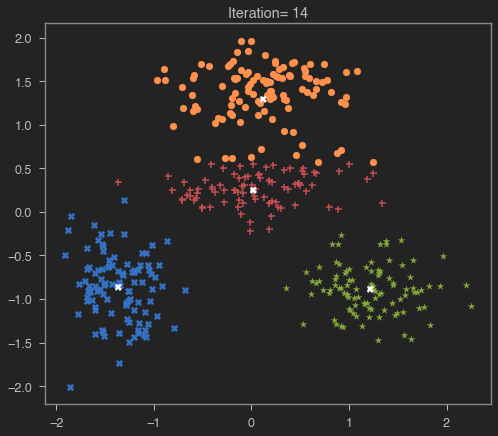

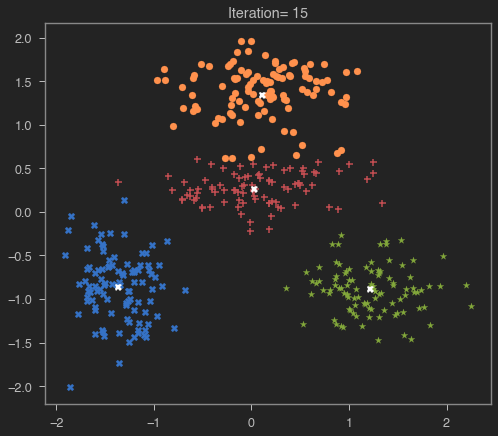

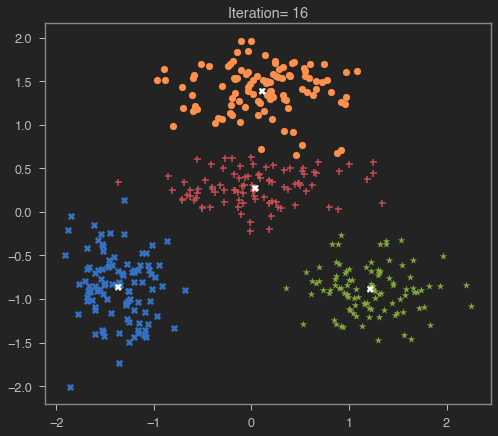

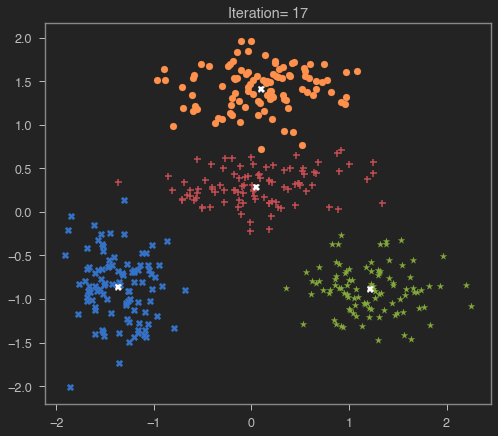

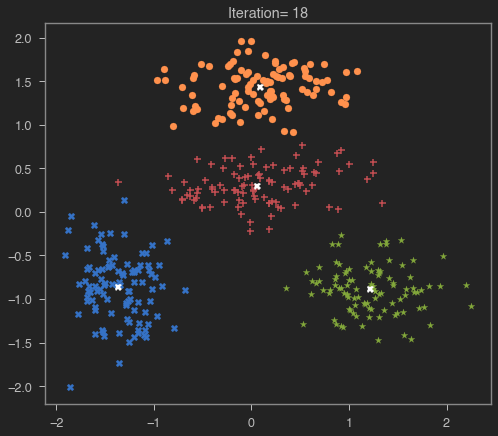

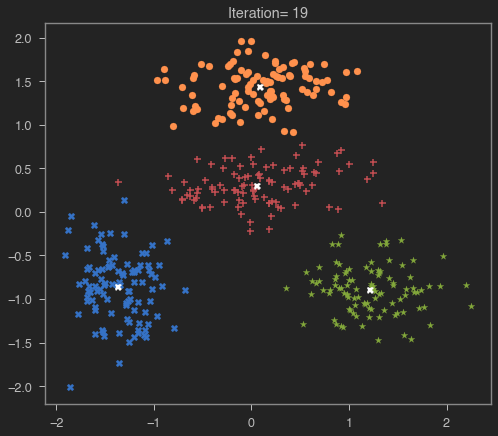

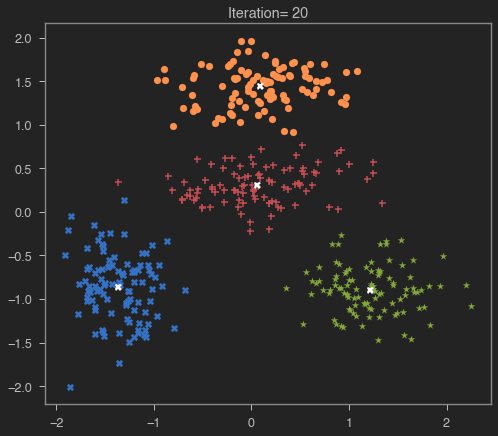

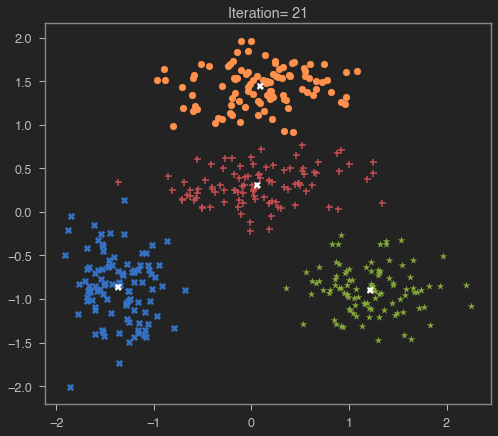

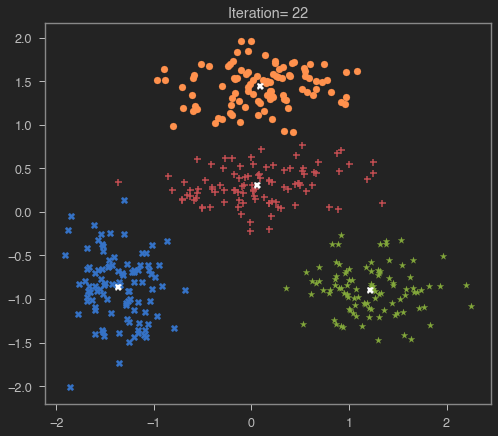

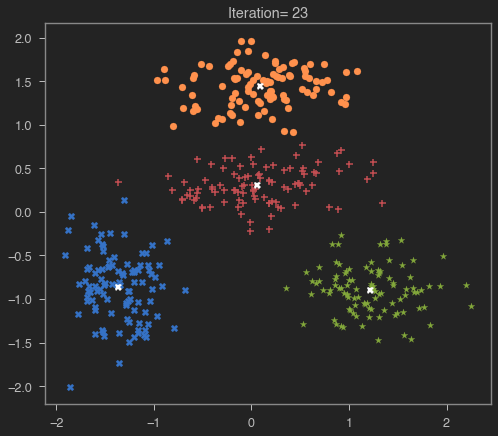

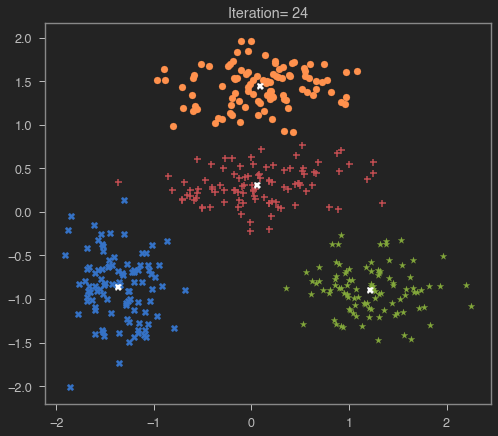

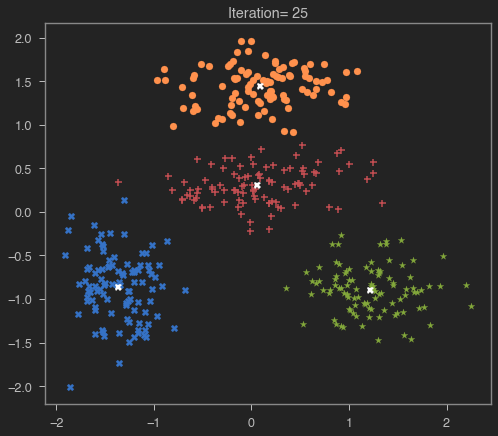

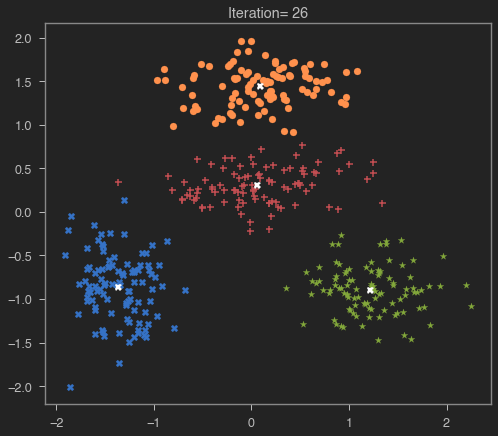

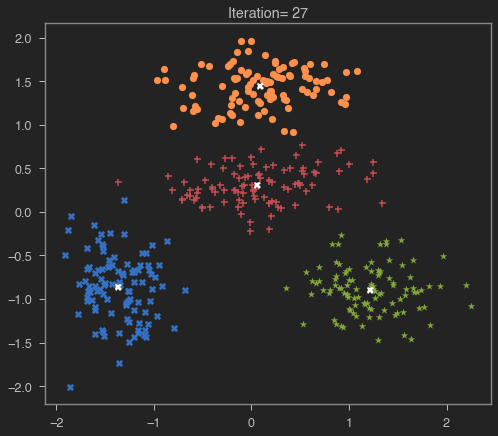

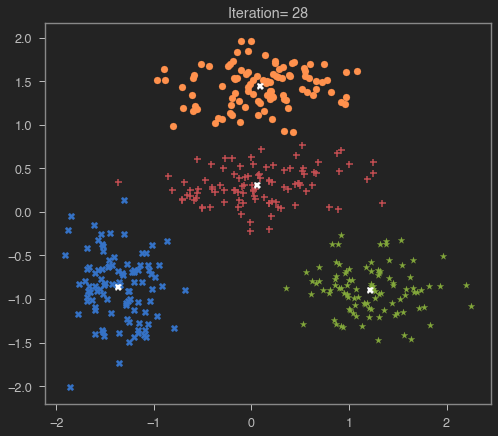

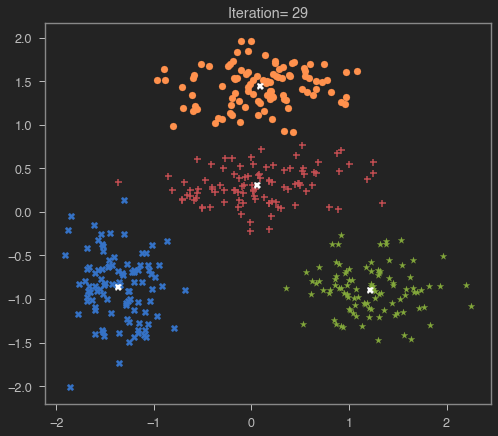

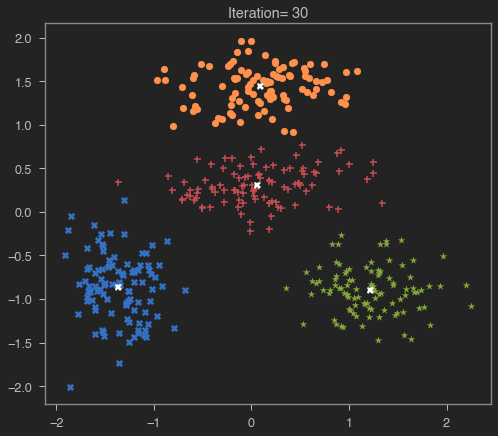

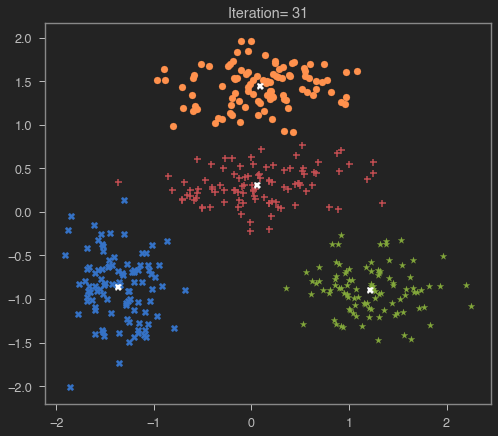

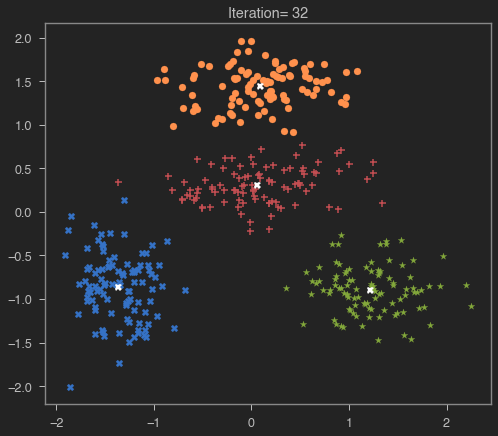

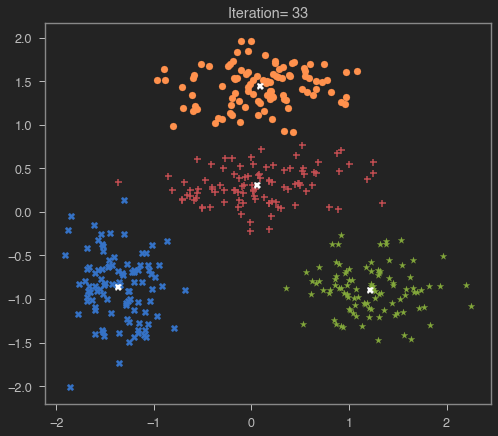

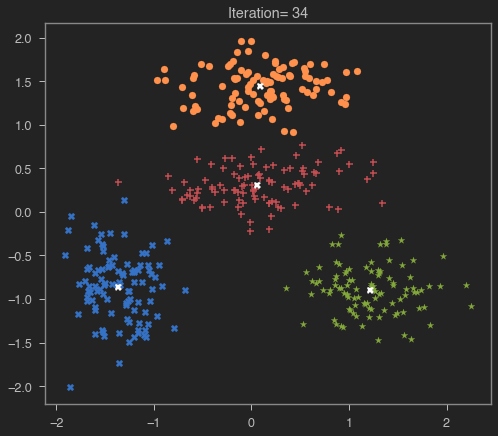

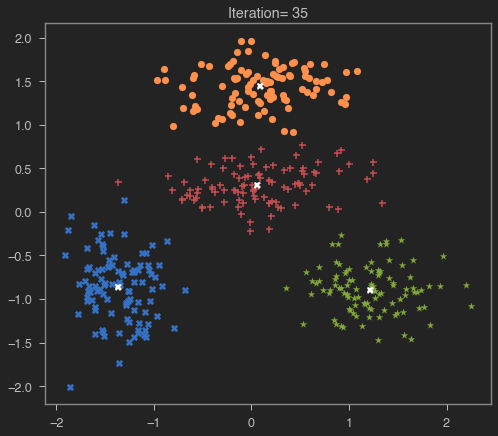

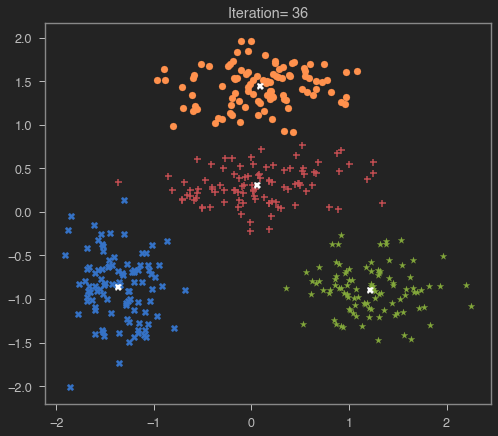

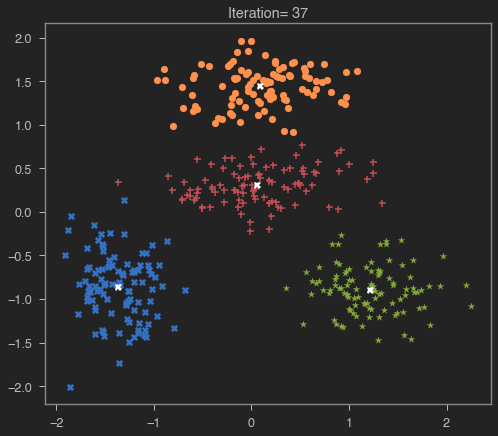

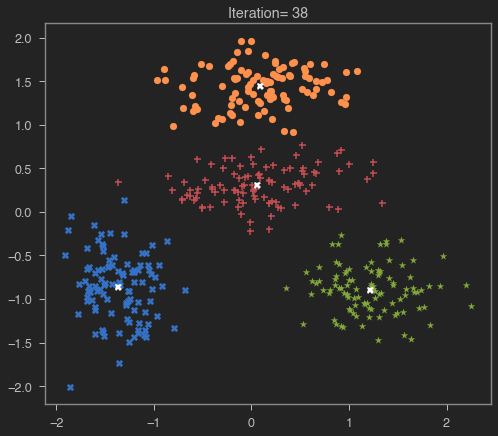

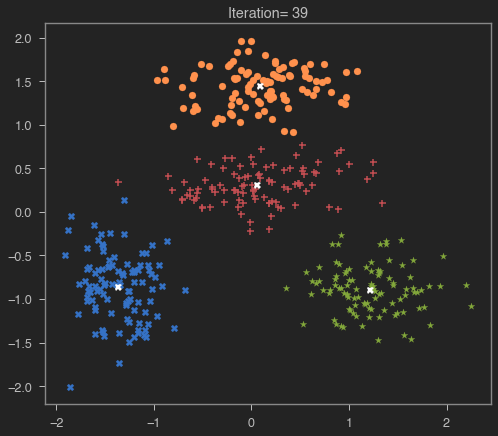

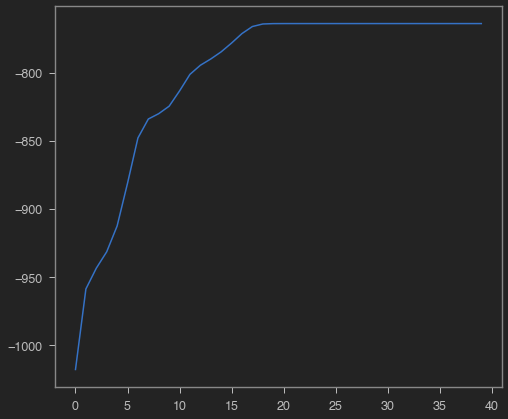

In [10]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y']
mrk=['+','*','X','o']


K = 4   # no. of clusters

theta=initialization(data,K)

for n in range(Itr):

    responsibility=E_Step_GMM(data,K,theta)

    cluster_label=np.argmax(responsibility,axis=1) #Label Points
    #print(cluster_label)
    theta,log_likhd=M_Step_GMM(data,responsibility)
    log_l.append(log_likhd)

    plt.figure()
    for l in range(K):
        id=np.where(cluster_label==l)
        plt.scatter(data[id,0],data[id,1],color=clr[l],marker=mrk[l])
        Cents=theta[l]['mu']
        plt.plot(Cents[0],Cents[1],'X',color='white')
        plt.title('Iteration= %d' % (n))

    if n>2:
        if abs(log_l[n]-log_l[n-1])<eps:
            break


plt.figure()  
plt.plot(log_l)

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [11]:
# write your code here
from sklearn.metrics import silhouette_score
print("Silhouette Score:",silhouette_score(data,cluster_label))

Silhouette Score: 0.5853873259096207


# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

Text(0.5, 1.0, 'GMM')

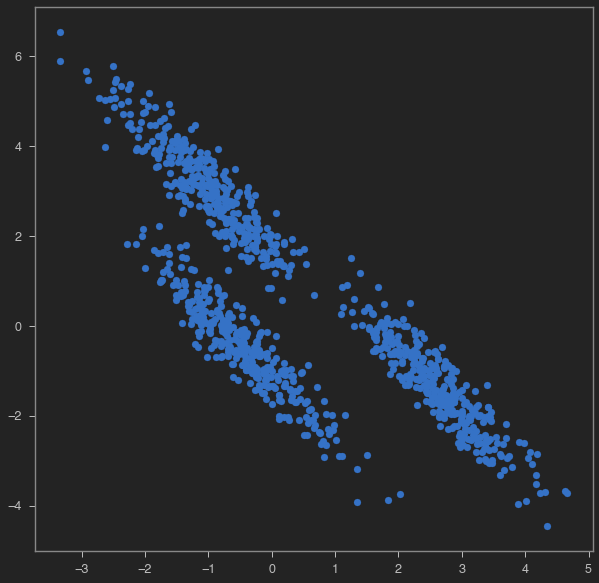

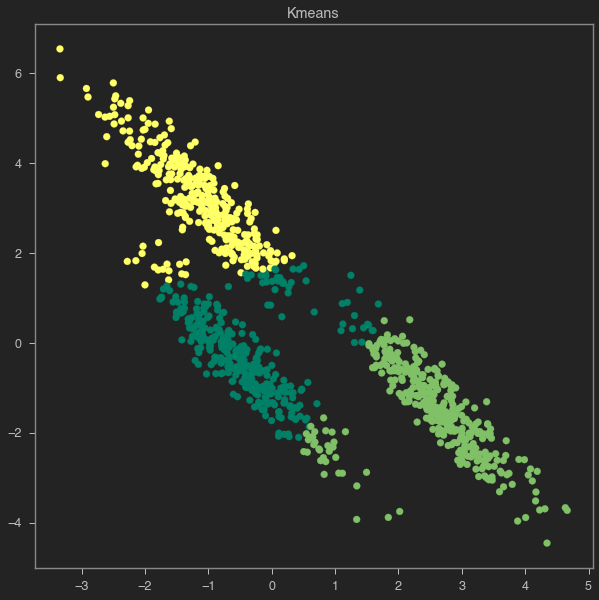

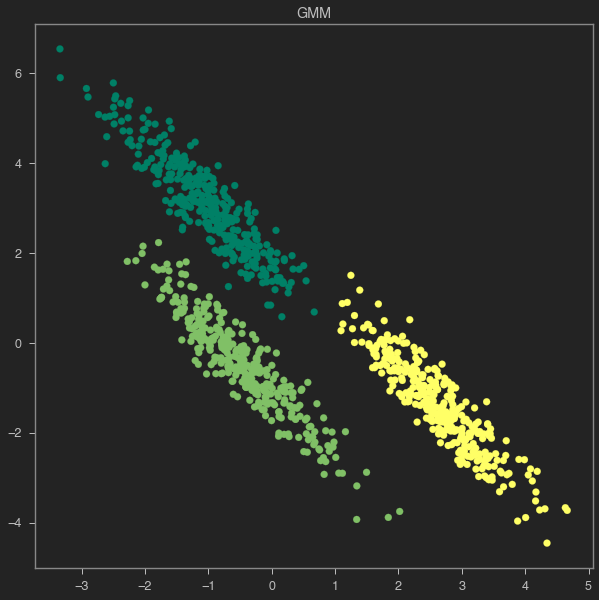

In [12]:
# write your code here
from sklearn import cluster, datasets, mixture

#Data which can differntiate between GMM and Kmenas
X, y = datasets.make_blobs(n_samples=1000,centers=[[1,4],[-2,-2],[6,2.5]], random_state=8)
transformation = [[0.6, -0.6], [-0.4,0.9]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

plt.figure(figsize=(10,10))
plt.scatter(X_aniso[:,0],X_aniso[:,1])

kmeans = km(n_clusters=3, random_state=0).fit(X_aniso)
y_pred = kmeans.predict(X_aniso)

plt.figure(figsize=(10,10))
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred,cmap='summer')
plt.title("Kmeans")

gmm = GMM(n_components=3, random_state=0).fit(X_aniso);
y_pred = gmm.predict(X_aniso);

plt.figure(figsize=(10,10))
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred,cmap='summer')
plt.title("GMM")

# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [13]:
import pandas as pd
from sklearn import preprocessing

path = '/Users/kushagrakhatwani/Sem5_PRML/Lab4/iris.csv'

df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
features=df.drop('Species',1)
features.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


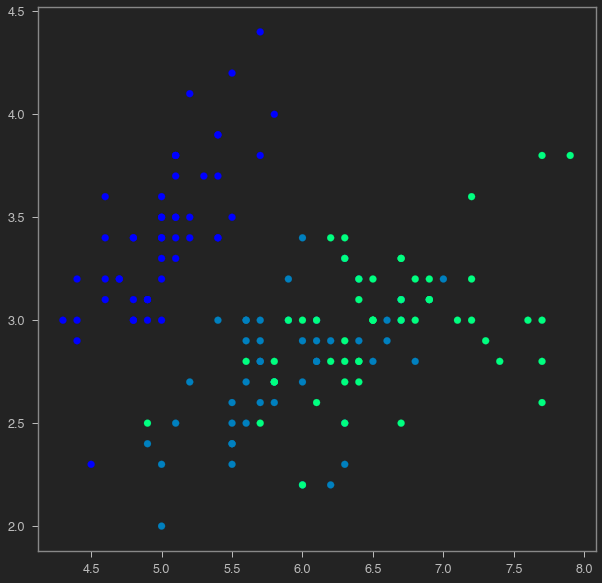

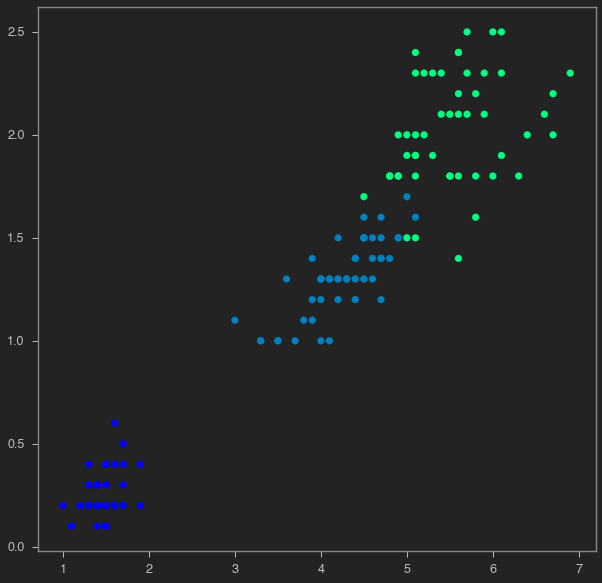

In [15]:
le = preprocessing.LabelEncoder()
le.fit(df.Species)
df['categorical_label'] = le.transform(df.Species)

labels = df['categorical_label']

plt.figure(figsize=(10,10))
plt.scatter(features['SepalLengthCm'],features['SepalWidthCm'],c=labels,cmap='winter')

plt.figure(figsize=(10,10))
plt.scatter(features['PetalLengthCm'],features['PetalWidthCm'],c=labels,cmap='winter')

0.8681109348039796


Text(0.5, 1.0, 'Confusion Matrix')

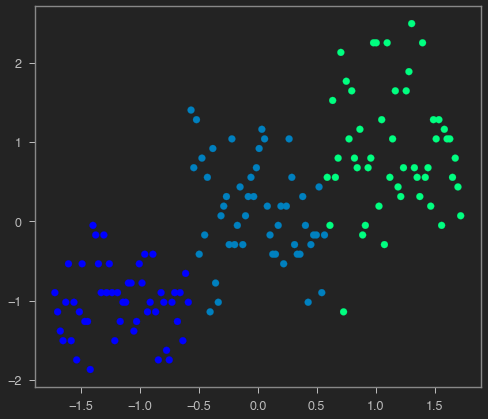

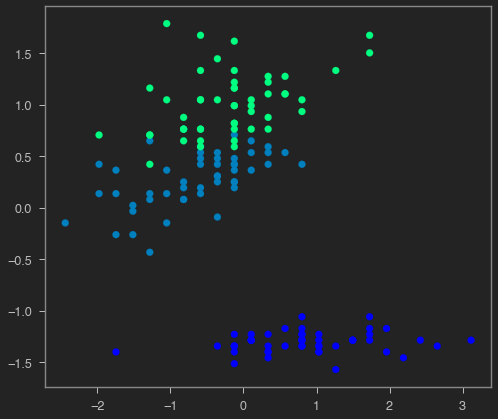

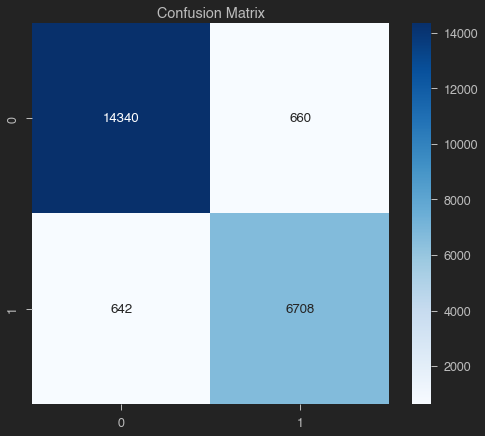

In [16]:
from sklearn.metrics.cluster import pair_confusion_matrix
import seaborn as sns
features = StandardScaler().fit_transform(features)
kmeans = km(n_clusters=3).fit(features)
y_pred = kmeans.predict(features)

acc = pair_confusion_matrix(labels,y_pred)
acc1 = adjusted_rand_score(labels,y_pred)
print(acc1)
plt.figure()
plt.scatter(features[:,0],features[:,1],c=labels,cmap='winter')

plt.figure()
plt.scatter(features[:,2],features[:,3],c=labels,cmap='winter')

plt.figure()
sns.heatmap(acc,cmap='Blues',annot=True,fmt='d')
plt.title("Confusion Matrix")

Accuracy: 0.0 for: 1
Accuracy: 0.5681159420289855 for: 2
Accuracy: 0.8681109348039796 for: 3
Accuracy: 0.8005611744579727 for: 4
Accuracy: 0.7032711906316583 for: 5
Accuracy: 0.5518069883112101 for: 6
Accuracy: 0.509915014164306 for: 7
Accuracy: 0.4505442788667653 for: 8
Accuracy: 0.39299771707470676 for: 9
Accuracy: 0.37827324041766053 for: 10
Optimal number of clusters: 3


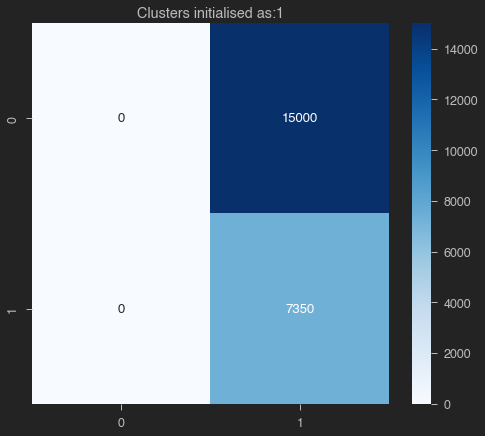

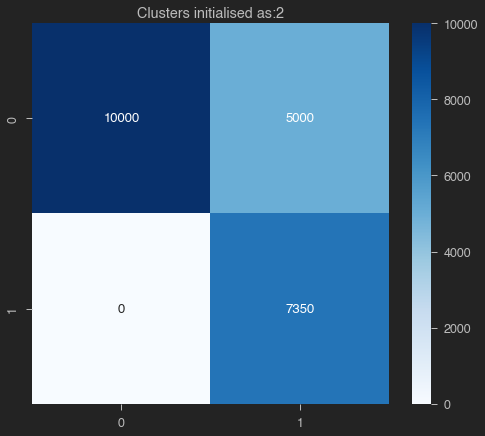

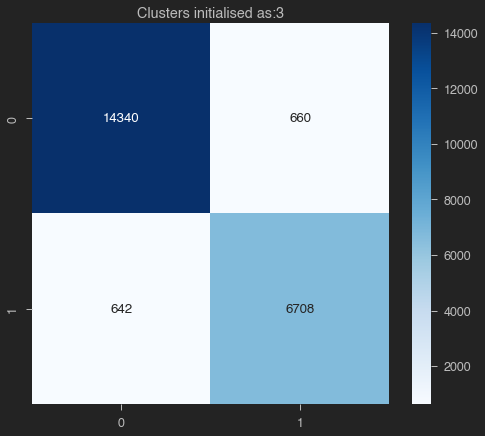

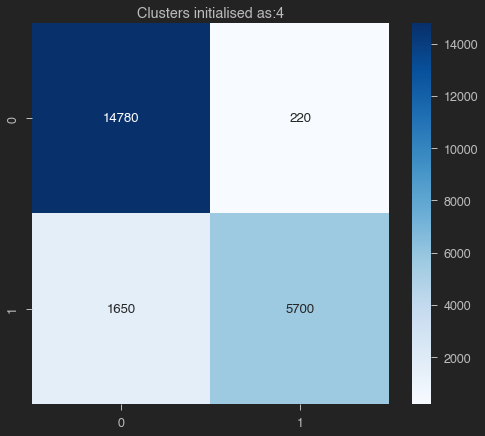

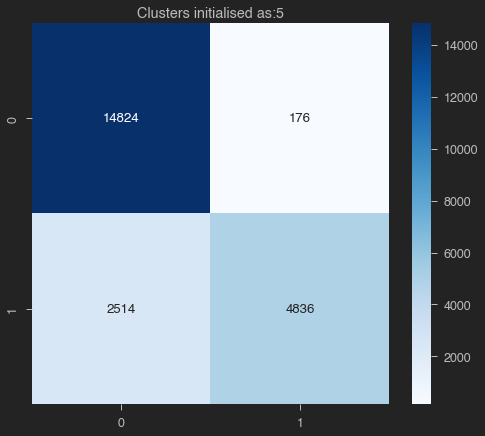

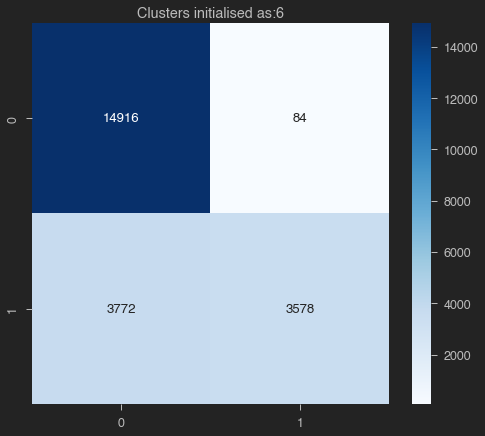

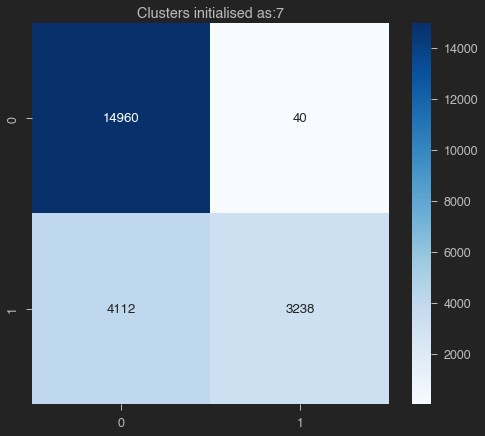

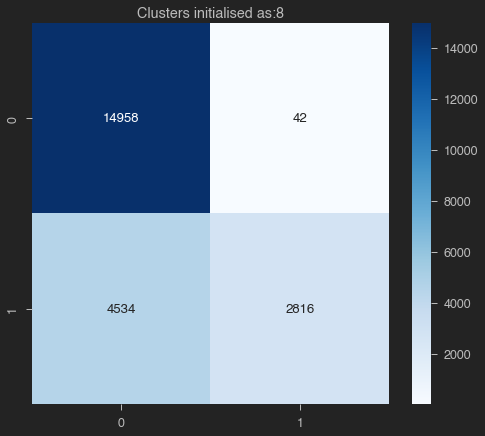

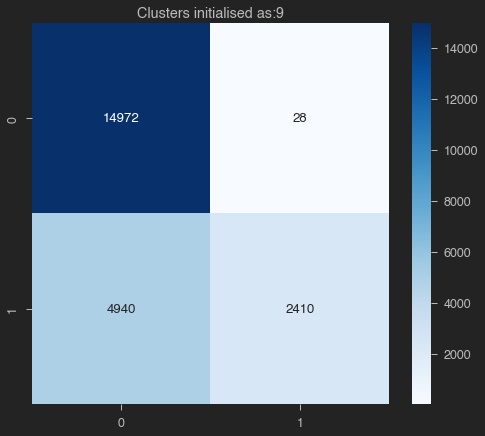

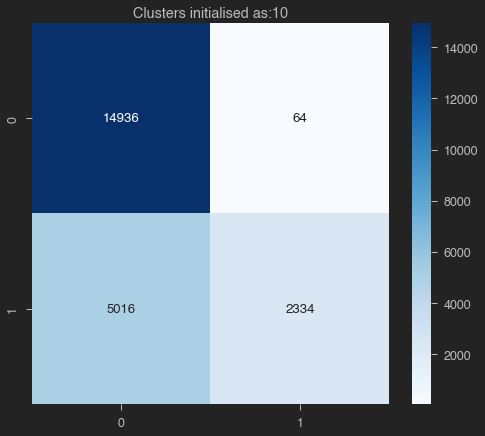

In [17]:
tmp=0
opt=0
for i in range(1,11):
    kmeans = km(n_clusters=i, random_state=0).fit(features)
    y_pred = kmeans.predict(features)

    acc = pair_confusion_matrix(labels,y_pred);
    acc1 = adjusted_rand_score(labels,y_pred)
    if(acc1>tmp):
        opt = i
        tmp = acc1
    plt.figure()
    sns.heatmap(acc,cmap='Blues',annot=True,fmt='d')
    plt.title("Clusters initialised as:"+str(i))
    print("Accuracy:",acc1,"for:",i)
print("Optimal number of clusters:",opt)

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

In [18]:
# write your code here
import pandas as pd
from sklearn import preprocessing

path = '/Users/kushagrakhatwani/Sem5_PRML/Lab4/iris.csv'

df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
features=df.drop('Species',1)
features.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


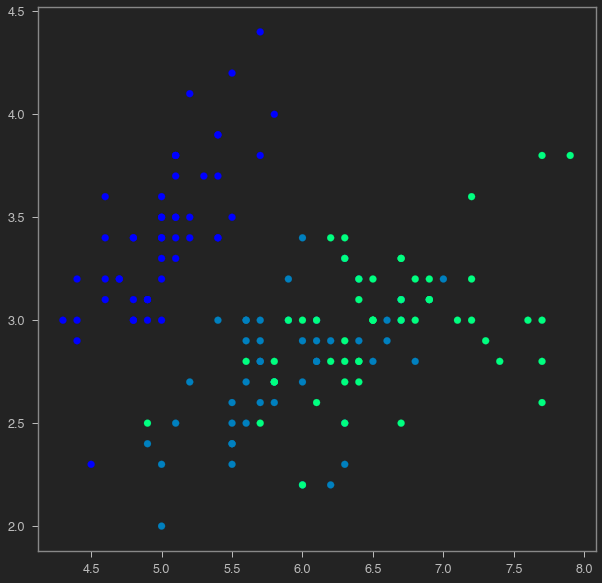

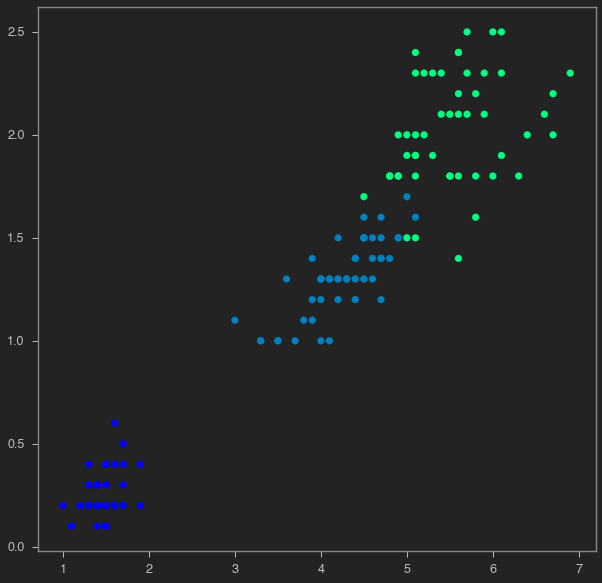

In [20]:
le = preprocessing.LabelEncoder()
le.fit(df.Species)
df['categorical_label'] = le.transform(df.Species)

labels = df['categorical_label']

plt.figure(figsize=(10,10))
plt.scatter(features['SepalLengthCm'],features['SepalWidthCm'],c=labels,cmap='winter')

plt.figure(figsize=(10,10))
plt.scatter(features['PetalLengthCm'],features['PetalWidthCm'],c=labels,cmap='winter')

Accuracy 1.0


Text(0.5, 1.0, 'Confusion Matrix')

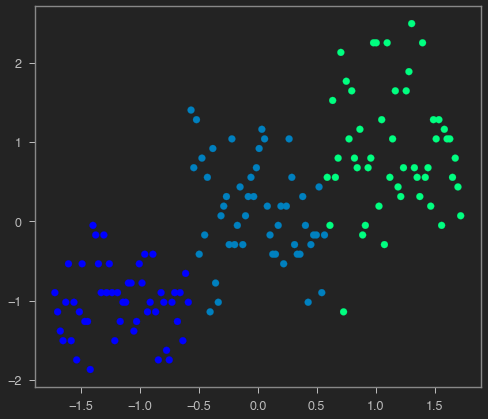

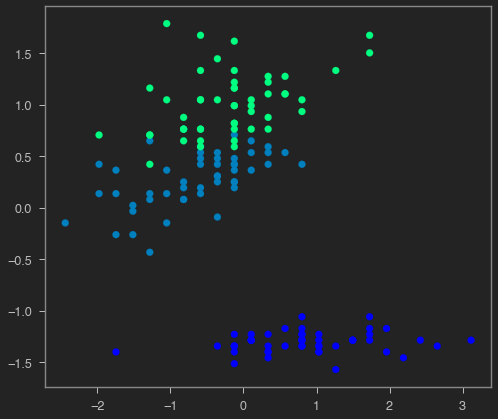

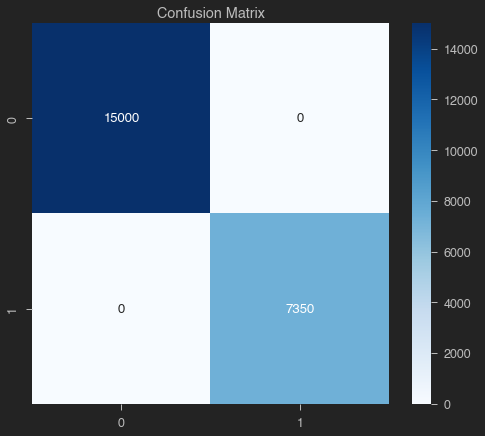

In [21]:
from sklearn.metrics.cluster import pair_confusion_matrix
import seaborn as sns
features = StandardScaler().fit_transform(features)
gmm = GMM(n_components=3).fit(features)
y_pred = gmm.predict(features)

acc1 = pair_confusion_matrix(labels,y_pred)

plt.figure()
plt.scatter(features[:,0],features[:,1],c=labels,cmap='winter')

plt.figure()
plt.scatter(features[:,2],features[:,3],c=labels,cmap='winter')

plt.figure()
acc = adjusted_rand_score(labels,y_pred)
print("Accuracy",acc)

sns.heatmap(acc1,cmap='Blues',annot=True,fmt='d')
plt.title("Confusion Matrix")